In [1]:
2+2

4

In [2]:
import tensorflow as tf

In [3]:
import keras as k

In [4]:
from sklearn import svm

In [6]:
! pip install optuna

     -------------------------------------- 365.3/365.3 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 212.2/212.2 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 192.1/192.1 kB 2.9 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, LogUniformDistribution
# https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html

C:\Users\dagne\anaconda3\envs\CatalystGAN\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
svc = svm.SVC(random_state=42)


In [3]:
optuna.distributions.FloatDistribution(1e-10, 1e10, log=True)

FloatDistribution(high=10000000000.0, log=True, low=1e-10, step=None)

In [4]:
optuna.distributions.FloatDistribution(0.1, 10, step=0.1)

FloatDistribution(high=10.0, log=False, low=0.1, step=0.1)

In [ ]:
a=optuna.distributions.FloatDistribution(0.1, 10, step=0.1)

In [ ]:
a

FloatDistribution(high=10.0, log=False, low=0.1, step=0.1)

In [10]:
import pandas as pd

In [19]:
df_suvrwb = pd.read_csv('C:/Users/dagne/Desktop/AUD_study/Catalyst_GAN/Catalysis_cGAN/AUD_SUVR_wb_cingulate.csv')
df_suvrwb

,Subj_id,ctx-lh-caudalanteriorcingulate,ctx-lh-isthmuscingulate,ctx-lh-posteriorcingulate,ctx-lh-rostralanteriorcingulate,ctx-rh-caudalanteriorcingulate,ctx-rh-isthmuscingulate,ctx-rh-posteriorcingulate,ctx-rh-rostralanteriorcingulate,CLASS
0,AUD_A_006,1.389292,1.302603,1.511788,1.305995,1.412095,1.243428,1.796167,1.297326,AUD
1,AUD_A_009,1.570342,1.418164,1.794156,1.550105,1.415331,1.308078,1.731828,1.561438,AUD
2,AUD_A_016,1.363950,1.185105,1.255505,1.259998,1.452323,1.197687,1.482580,1.321410,AUD
3,AUD_A_018,1.237856,1.218009,1.679985,1.445994,1.588844,1.267628,1.612086,1.379400,AUD
4,aud_a_019,1.247036,1.256451,1.630632,1.251918,1.449644,1.382689,1.608314,1.308411,AUD
5,AUD_A_021,1.427571,1.155945,1.551276,1.375638,1.178702,1.352006,1.670022,1.351714,AUD
6,AUD_A_022,1.236162,0.941630,1.692721,1.326065,1.425361,1.093593,1.721905,1.060718,AUD
7,AUD_A_026,1.567669,1.263971,1.702433,1.433225,1.740436,1.356262,1.849013,1.588108,AUD
8,AUD_A_027,1.103955,1.498268,1.512243,1.250076,1.015554,1.740689,1.616137,1.305061,AUD
9,AUD_P_002,1.585559,1.460900,1.699190,1.450352,1.483914,1.495661,1.592511,1.358537,AUD


In [20]:
##### Load Demographic data
df_demography = pd.read_csv('C:/Users/dagne/Desktop/AUD_study/CODES/Demography plot/demo.csv')
df_demography

,Subj_id,Sex,Age,BMI,Mstat_Dose,Class
0,AUD_A_006,M,29.0,36.7,4.78,AUD
1,AUD_A_009,F,23.0,20.2,5.39,AUD
2,AUD_A_016,M,27.0,28.6,5.02,AUD
3,AUD_A_018,M,31.0,26.5,5.33,AUD
4,aud_a_019,M,32.0,29.4,5.67,AUD
5,AUD_A_021,F,57.0,23.5,5.25,AUD
6,AUD_A_022,M,45.0,23.6,5.70,AUD
7,AUD_A_026,F,23.0,31.4,5.35,AUD
8,AUD_A_027,M,61.0,29.3,5.02,AUD
9,AUD_P_002,M,48.0,34.8,5.49,AUD


In [31]:
df2_suvrdemog = df_suvrwb.merge(df_demography, on='Subj_id', how='left')    
df2_suvrdemog=df2_suvrdemog.drop(columns=['CLASS','BMI','Mstat_Dose'])

df2_suvrdemog.loc[df2_suvrdemog["Class"] == "AUD", "Class"] = 1
df2_suvrdemog.loc[df2_suvrdemog["Class"] == "CNT", "Class"] = 0

df2_suvrdemog.loc[df2_suvrdemog["Sex"] == "M", "Sex"] = 1
df2_suvrdemog.loc[df2_suvrdemog["Sex"] == "F", "Sex"] = 0

df2_suvrdemog

,Subj_id,ctx-lh-caudalanteriorcingulate,ctx-lh-isthmuscingulate,ctx-lh-posteriorcingulate,ctx-lh-rostralanteriorcingulate,ctx-rh-caudalanteriorcingulate,ctx-rh-isthmuscingulate,ctx-rh-posteriorcingulate,ctx-rh-rostralanteriorcingulate,Sex,Age,Class
0,AUD_A_006,1.389292,1.302603,1.511788,1.305995,1.412095,1.243428,1.796167,1.297326,1,29.0,1
1,AUD_A_009,1.570342,1.418164,1.794156,1.550105,1.415331,1.308078,1.731828,1.561438,0,23.0,1
2,AUD_A_016,1.363950,1.185105,1.255505,1.259998,1.452323,1.197687,1.482580,1.321410,1,27.0,1
3,AUD_A_018,1.237856,1.218009,1.679985,1.445994,1.588844,1.267628,1.612086,1.379400,1,31.0,1
4,aud_a_019,1.247036,1.256451,1.630632,1.251918,1.449644,1.382689,1.608314,1.308411,1,32.0,1
5,AUD_A_021,1.427571,1.155945,1.551276,1.375638,1.178702,1.352006,1.670022,1.351714,0,57.0,1
6,AUD_A_022,1.236162,0.941630,1.692721,1.326065,1.425361,1.093593,1.721905,1.060718,1,45.0,1
7,AUD_A_026,1.567669,1.263971,1.702433,1.433225,1.740436,1.356262,1.849013,1.588108,0,23.0,1
8,AUD_A_027,1.103955,1.498268,1.512243,1.250076,1.015554,1.740689,1.616137,1.305061,1,61.0,1
9,AUD_P_002,1.585559,1.460900,1.699190,1.450352,1.483914,1.495661,1.592511,1.358537,1,48.0,1


In [32]:
df2_suvr=df2_suvrdemog.drop(columns=['Sex','Age'])
df2_suvr

,Subj_id,ctx-lh-caudalanteriorcingulate,ctx-lh-isthmuscingulate,ctx-lh-posteriorcingulate,ctx-lh-rostralanteriorcingulate,ctx-rh-caudalanteriorcingulate,ctx-rh-isthmuscingulate,ctx-rh-posteriorcingulate,ctx-rh-rostralanteriorcingulate,Class
0,AUD_A_006,1.389292,1.302603,1.511788,1.305995,1.412095,1.243428,1.796167,1.297326,1
1,AUD_A_009,1.570342,1.418164,1.794156,1.550105,1.415331,1.308078,1.731828,1.561438,1
2,AUD_A_016,1.363950,1.185105,1.255505,1.259998,1.452323,1.197687,1.482580,1.321410,1
3,AUD_A_018,1.237856,1.218009,1.679985,1.445994,1.588844,1.267628,1.612086,1.379400,1
4,aud_a_019,1.247036,1.256451,1.630632,1.251918,1.449644,1.382689,1.608314,1.308411,1
5,AUD_A_021,1.427571,1.155945,1.551276,1.375638,1.178702,1.352006,1.670022,1.351714,1
6,AUD_A_022,1.236162,0.941630,1.692721,1.326065,1.425361,1.093593,1.721905,1.060718,1
7,AUD_A_026,1.567669,1.263971,1.702433,1.433225,1.740436,1.356262,1.849013,1.588108,1
8,AUD_A_027,1.103955,1.498268,1.512243,1.250076,1.015554,1.740689,1.616137,1.305061,1
9,AUD_P_002,1.585559,1.460900,1.699190,1.450352,1.483914,1.495661,1.592511,1.358537,1


In [33]:
df2_suvrdemog

,Subj_id,ctx-lh-caudalanteriorcingulate,ctx-lh-isthmuscingulate,ctx-lh-posteriorcingulate,ctx-lh-rostralanteriorcingulate,ctx-rh-caudalanteriorcingulate,ctx-rh-isthmuscingulate,ctx-rh-posteriorcingulate,ctx-rh-rostralanteriorcingulate,Sex,Age,Class
0,AUD_A_006,1.389292,1.302603,1.511788,1.305995,1.412095,1.243428,1.796167,1.297326,1,29.0,1
1,AUD_A_009,1.570342,1.418164,1.794156,1.550105,1.415331,1.308078,1.731828,1.561438,0,23.0,1
2,AUD_A_016,1.363950,1.185105,1.255505,1.259998,1.452323,1.197687,1.482580,1.321410,1,27.0,1
3,AUD_A_018,1.237856,1.218009,1.679985,1.445994,1.588844,1.267628,1.612086,1.379400,1,31.0,1
4,aud_a_019,1.247036,1.256451,1.630632,1.251918,1.449644,1.382689,1.608314,1.308411,1,32.0,1
5,AUD_A_021,1.427571,1.155945,1.551276,1.375638,1.178702,1.352006,1.670022,1.351714,0,57.0,1
6,AUD_A_022,1.236162,0.941630,1.692721,1.326065,1.425361,1.093593,1.721905,1.060718,1,45.0,1
7,AUD_A_026,1.567669,1.263971,1.702433,1.433225,1.740436,1.356262,1.849013,1.588108,0,23.0,1
8,AUD_A_027,1.103955,1.498268,1.512243,1.250076,1.015554,1.740689,1.616137,1.305061,1,61.0,1
9,AUD_P_002,1.585559,1.460900,1.699190,1.450352,1.483914,1.495661,1.592511,1.358537,1,48.0,1


In [91]:
for row in range(0,27):
    for roi in range(0,9):
        df2_suvrdemog_2['Subj_id']=


SyntaxError: invalid syntax (3775516685.py, line 3)

In [36]:
X1=df2_suvrdemog.drop(columns=['Subj_id','Sex','Age','Class'])
X2=df2_suvrdemog.drop(columns=['Subj_id','Class'])
y=df2_suvrdemog['Class']

In [90]:
#X1
#X2
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
Name: Class, dtype: object

In [41]:
X2

,ctx-lh-caudalanteriorcingulate,ctx-lh-isthmuscingulate,ctx-lh-posteriorcingulate,ctx-lh-rostralanteriorcingulate,ctx-rh-caudalanteriorcingulate,ctx-rh-isthmuscingulate,ctx-rh-posteriorcingulate,ctx-rh-rostralanteriorcingulate,Sex,Age
0,1.389292,1.302603,1.511788,1.305995,1.412095,1.243428,1.796167,1.297326,1,29.0
1,1.570342,1.418164,1.794156,1.550105,1.415331,1.308078,1.731828,1.561438,0,23.0
2,1.363950,1.185105,1.255505,1.259998,1.452323,1.197687,1.482580,1.321410,1,27.0
3,1.237856,1.218009,1.679985,1.445994,1.588844,1.267628,1.612086,1.379400,1,31.0
4,1.247036,1.256451,1.630632,1.251918,1.449644,1.382689,1.608314,1.308411,1,32.0
5,1.427571,1.155945,1.551276,1.375638,1.178702,1.352006,1.670022,1.351714,0,57.0
6,1.236162,0.941630,1.692721,1.326065,1.425361,1.093593,1.721905,1.060718,1,45.0
7,1.567669,1.263971,1.702433,1.433225,1.740436,1.356262,1.849013,1.588108,0,23.0
8,1.103955,1.498268,1.512243,1.250076,1.015554,1.740689,1.616137,1.305061,1,61.0
9,1.585559,1.460900,1.699190,1.450352,1.483914,1.495661,1.592511,1.358537,1,48.0


In [81]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
sns.violinplot(data=df, x="class", y="age", hue="alive")


In [ ]:
ctx-lh-caudalanteriorcingulate ctx-lh-isthmuscingulate ctx-lh-posteriorcingulate ctx-lh-rostralanteriorcingulate ctx-rh-caudalanteriorcingulate ctx-rh-isthmuscingulate ctx-rh-posteriorcingulate ctx-rh-rostralanteriorcingulate
sns.violinplot(data=df, x="class", y="age", hue="alive")


<AxesSubplot: xlabel='Class', ylabel='ctx-lh-caudalanteriorcingulate'>

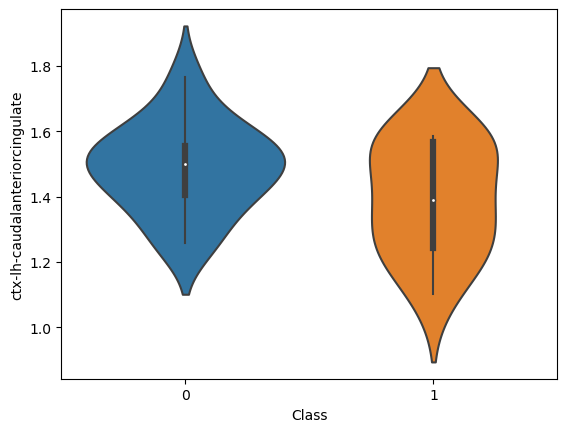

In [82]:
import seaborn as sns
sns.violinplot(data=df2_suvrdemog, x="Class", y="ctx-lh-caudalanteriorcingulate")


<AxesSubplot: xlabel='Class', ylabel='ctx-lh-caudalanteriorcingulate'>

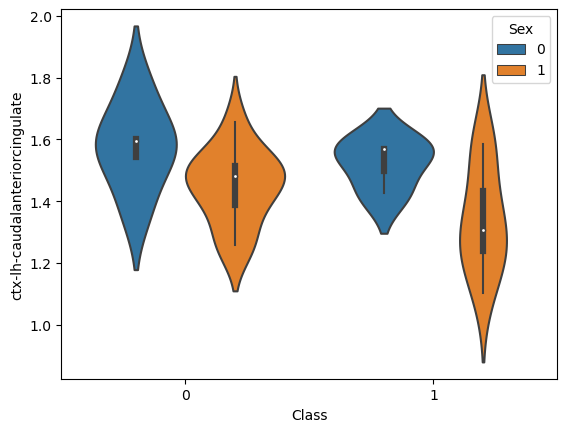

In [85]:
sns.violinplot(data=df2_suvrdemog, x="Class", y="ctx-lh-caudalanteriorcingulate", hue="Sex")


In [72]:
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, LogUniformDistribution
# https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html


svc = svm.SVC(kernel='rbf', random_state=42)

cv = LeaveOneOut()

#search_spaces =  { "C": optuna.distributions.FloatDistribution(1e-10, 1e10, log=True),
#                    "kernel": CategoricalDistribution({'linear', 'poly', 'rbf', 'sigmoid'}),
#                }

search_spaces =  { "C": optuna.distributions.FloatDistribution(0.1, 10, step=0.1)
                }

optuna_search = OptunaSearchCV(
    estimator=svc,
    param_distributions=search_spaces,
    n_trials=20,
    cv=cv,
    error_score=0.0,
    refit=True,
)

C:\Users\dagne\AppData\Local\Temp\ipykernel_26588\3504979099.py:20: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(


In [73]:
#Model 1
optuna_search.fit(X1, y.astype(int))

[I 2023-03-17 14:27:46,218] A new study created in memory with name: no-name-e987d8b0-770e-4aad-861f-134c186bf394
[I 2023-03-17 14:27:46,276] Trial 0 finished with value: 0.7037037037037037 and parameters: {'C': 7.8}. Best is trial 0 with value: 0.7037037037037037.
[I 2023-03-17 14:27:46,344] Trial 1 finished with value: 0.7037037037037037 and parameters: {'C': 3.5000000000000004}. Best is trial 0 with value: 0.7037037037037037.
[I 2023-03-17 14:27:46,405] Trial 2 finished with value: 0.7037037037037037 and parameters: {'C': 3.8000000000000003}. Best is trial 0 with value: 0.7037037037037037.
[I 2023-03-17 14:27:46,470] Trial 3 finished with value: 0.6666666666666666 and parameters: {'C': 9.6}. Best is trial 0 with value: 0.7037037037037037.
[I 2023-03-17 14:27:46,544] Trial 4 finished with value: 0.7037037037037037 and parameters: {'C': 6.7}. Best is trial 0 with value: 0.7037037037037037.
[I 2023-03-17 14:27:46,595] Trial 5 finished with value: 0.7037037037037037 and parameters: {'C'

OptunaSearchCV(cv=LeaveOneOut(), error_score=0.0,
               estimator=SVC(random_state=42), n_trials=20,
               param_distributions={'C': FloatDistribution(high=10.0, log=False, low=0.1, step=0.1)})

In [74]:
#Model 1

optuna_search.best_score_

0.7407407407407407

In [75]:
#Model 1

optuna_search.best_params_

{'C': 5.5}

NameError: name 'X' is not defined

In [76]:
#Model 2
optuna_search.fit(X2, y.astype(int))

[I 2023-03-17 14:32:47,819] A new study created in memory with name: no-name-76664df1-2527-4ba0-935d-c524f340c673
[I 2023-03-17 14:32:47,891] Trial 0 finished with value: 0.5925925925925926 and parameters: {'C': 0.30000000000000004}. Best is trial 0 with value: 0.5925925925925926.
[I 2023-03-17 14:32:47,959] Trial 1 finished with value: 0.5925925925925926 and parameters: {'C': 8.0}. Best is trial 0 with value: 0.5925925925925926.
[I 2023-03-17 14:32:48,027] Trial 2 finished with value: 0.5925925925925926 and parameters: {'C': 2.8000000000000003}. Best is trial 0 with value: 0.5925925925925926.
[I 2023-03-17 14:32:48,080] Trial 3 finished with value: 0.5925925925925926 and parameters: {'C': 5.5}. Best is trial 0 with value: 0.5925925925925926.
[I 2023-03-17 14:32:48,161] Trial 4 finished with value: 0.5925925925925926 and parameters: {'C': 8.3}. Best is trial 0 with value: 0.5925925925925926.
[I 2023-03-17 14:32:48,228] Trial 5 finished with value: 0.5925925925925926 and parameters: {'C

OptunaSearchCV(cv=LeaveOneOut(), error_score=0.0,
               estimator=SVC(random_state=42), n_trials=20,
               param_distributions={'C': FloatDistribution(high=10.0, log=False, low=0.1, step=0.1)})

In [77]:
#Model 2

optuna_search.best_score_

0.5925925925925926

In [78]:
#Model 2

optuna_search.best_params_

{'C': 0.30000000000000004}